# Soddisfazione dei clienti di una compagnia aerea

Progetto di Machine learning del corso di Data Science della piattaforma start2impact.

Il progetto parte da un dataset diviso in train e test e la sua analisi non è definita, in modo da simulare il più possibile un progetto reale. L'obbettivo è sviluppare un buon modello che abbia come target la soddisfazione dei clienti di una compagnia aerea.
Fatte queste premesse, non mi sono focalizzato sulla visualizzazione (come ho fatto per il precedente progetto) e ho utilizzato Seaborn per sveltire il codice.

Il progetto è stato inviato in data 08/06/2022 ed è in fase di correzione dal docente.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [2]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Creo la colonna train_test per distinguere i dati di training da quelli test nel df che conterrà tutti i dati
training['train_test'] = 1
test['train_test'] = 0
df=pd.concat([training,test])
training=training.drop(columns='train_test')

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Il dataset contiene sia variabili quantitative che qualitative. Sono presenti dei valori nulli nella colonna 'Arrival Delay in Minutes'.

In [4]:
training.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
training.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
#Elimino colonne inutili
training=training.drop(columns=['Unnamed: 0','id'])
df=df.drop(columns=['Unnamed: 0','id',])

# EDA

Per prima cosa guardo se i dati di training sono bilanciati

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

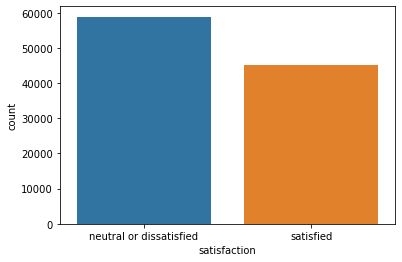

In [7]:
sns.countplot(data=training, x='satisfaction')

In [8]:
#Sostituisco ai valori qualitativi i corrispondenti binari nel df
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

Analizzo separatamente i dati qualitativi e quantitativi.

In [9]:
#Dati qualitativi
train_qual= training.loc[:,training.dtypes ==object].copy()
#Dati quantitativi
train_quant=training.loc[:, (training.dtypes !=object) | (training.columns=='satisfaction')].copy()

## -Variabili qualitative

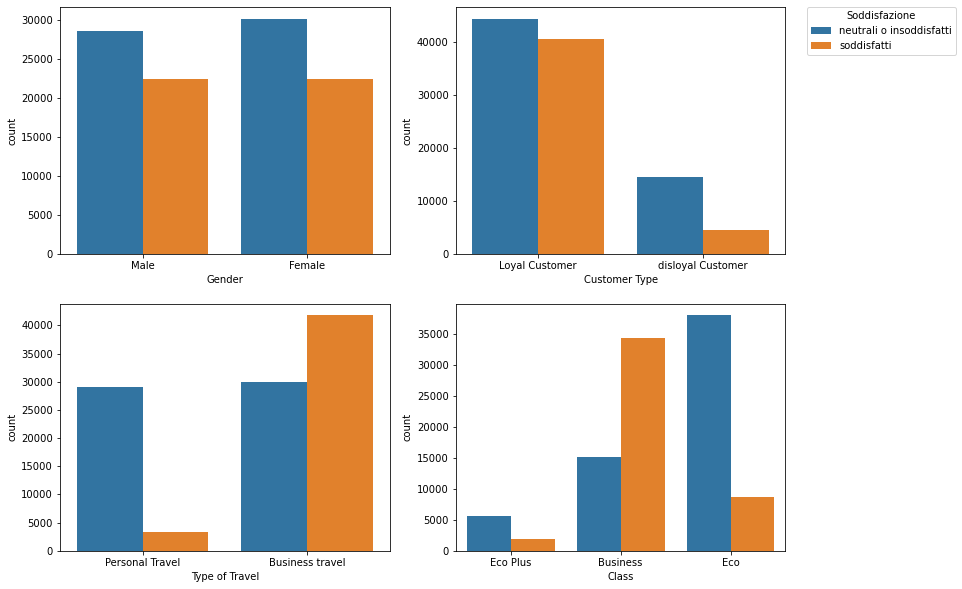

In [10]:
plt.figure(figsize=(13,10))
for i,var in enumerate(train_qual.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.countplot(data=train_qual, x=var,hue='satisfaction')
    plt.legend([],[], frameon=False)

plt.legend(title='Soddisfazione',labels=['neutrali o insoddisfatti','soddisfatti'], loc = 2, bbox_to_anchor = (1.05,2.22))    
plt.show()

In [11]:
a=pd.pivot_table(training, index = 'satisfaction', columns = 'Class', values = 'Gender' ,aggfunc ='count')
for col in a.columns:
    sodd=a.loc['satisfied',col]/ train_qual.Class.value_counts()[col]*100
    print(f'Soddisfatti {col}: {sodd:.1f}%' )

Soddisfatti Business: 69.4%
Soddisfatti Eco: 18.6%
Soddisfatti Eco Plus: 24.6%


In [13]:
#Ordinal encoder
df['Gender'] = df['Gender'].map({ 'Male':1,'Female':0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({ 'Business travel':1,'Personal Travel':0})

#One-hot per le restanti variabili qualitative (Class)
df=pd.get_dummies(df)

## -Variabili quantitative

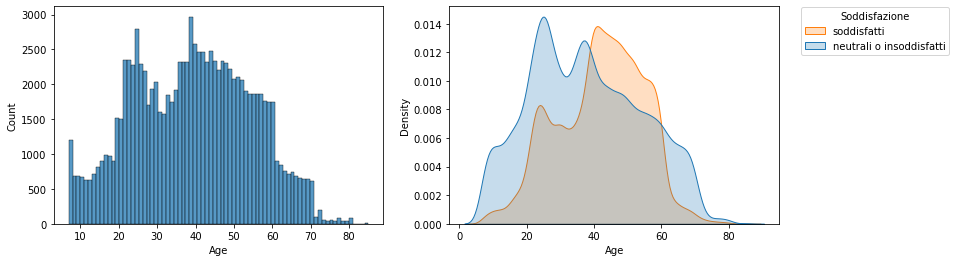

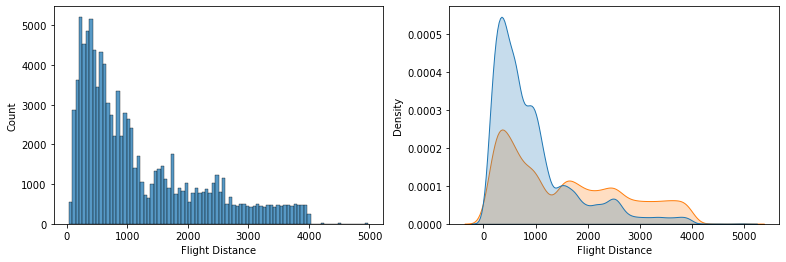

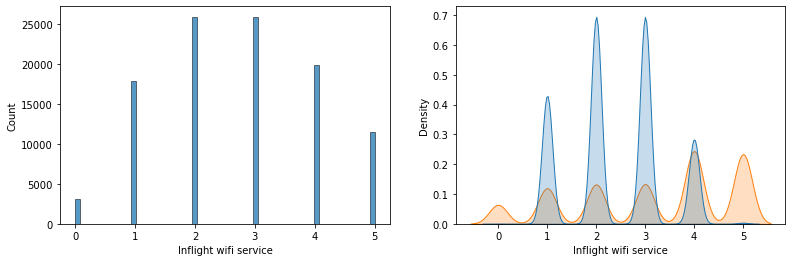

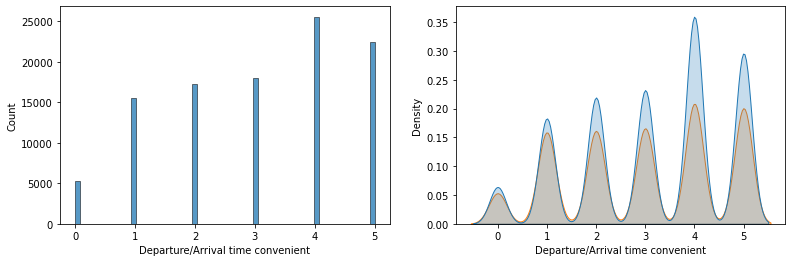

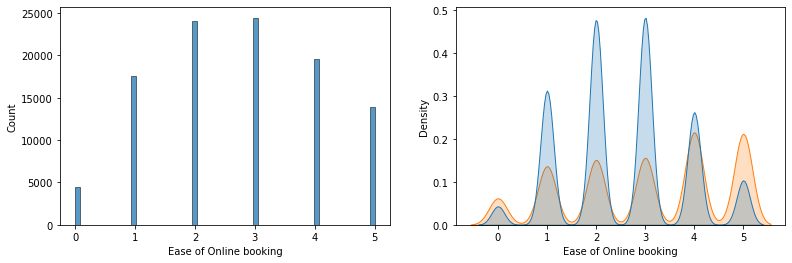

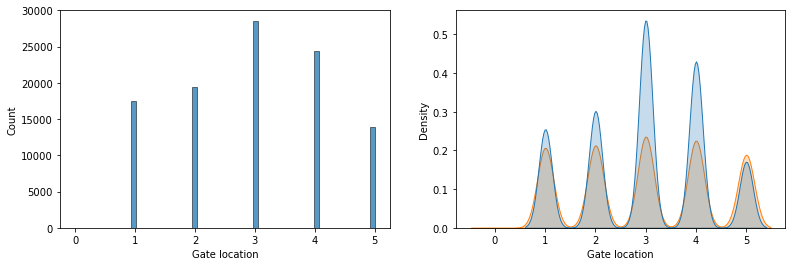

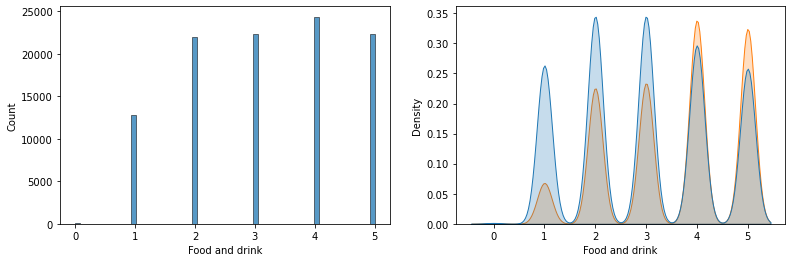

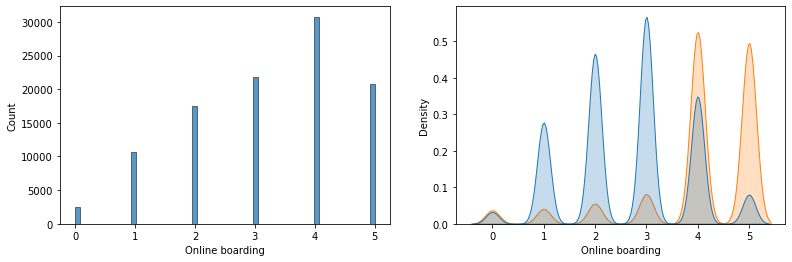

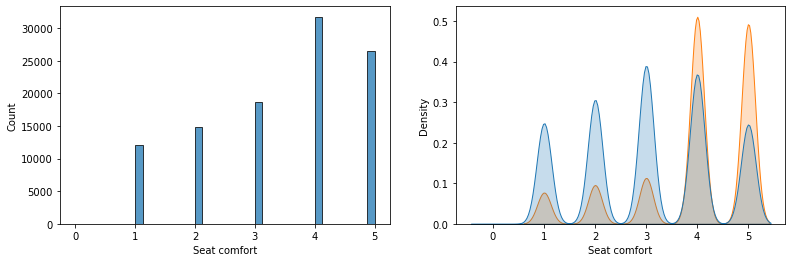

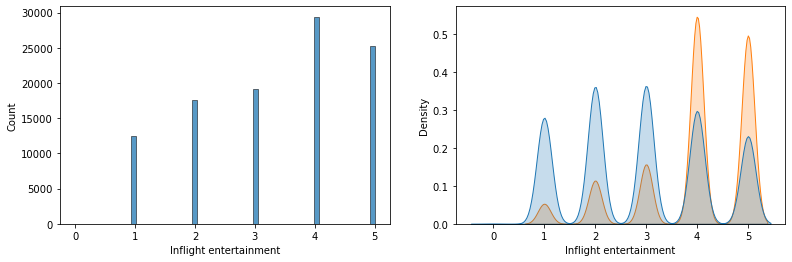

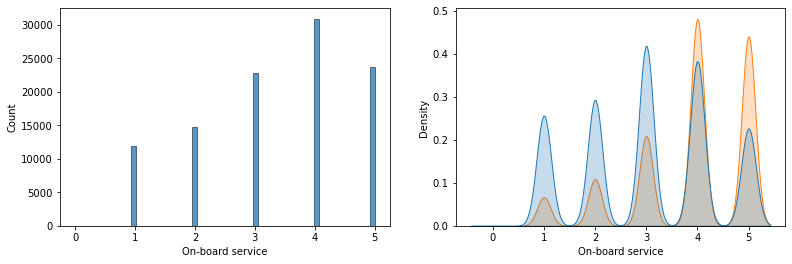

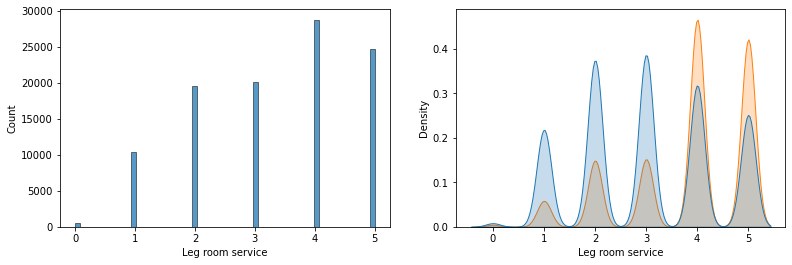

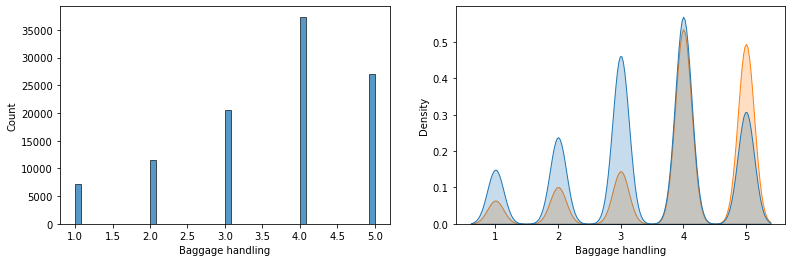

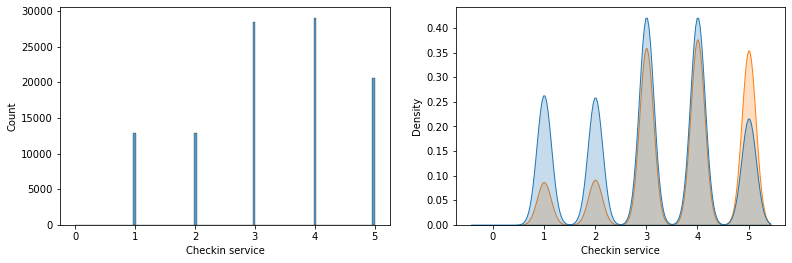

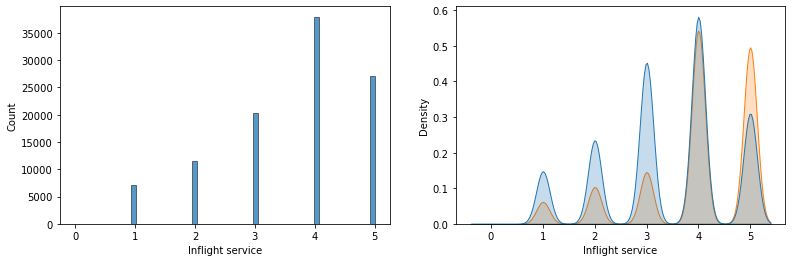

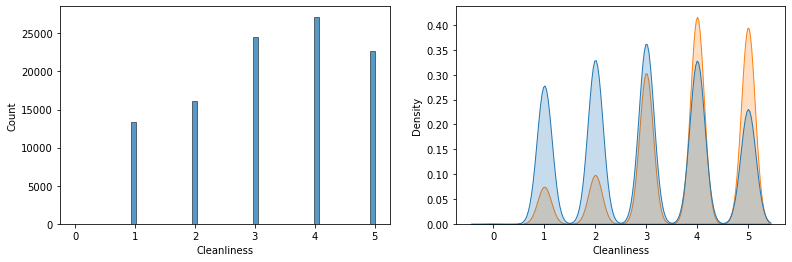

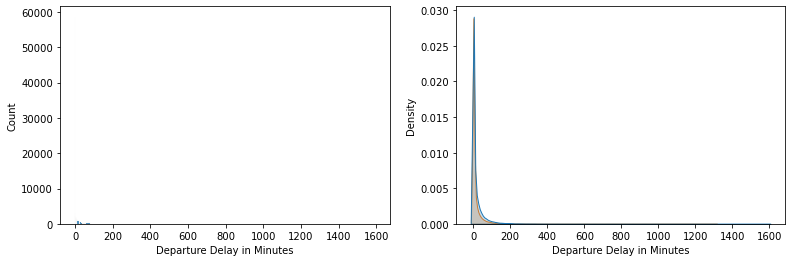

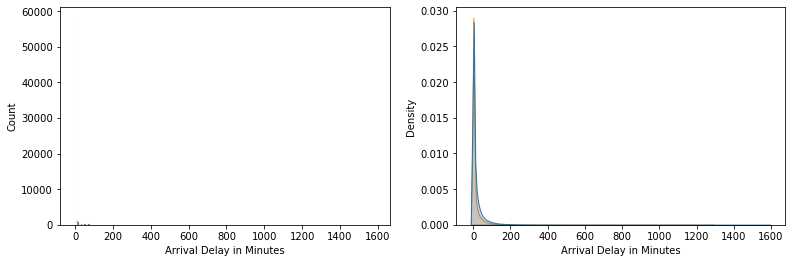

In [14]:
for var in train_quant.columns[:-1]:
    fig,ax = plt.subplots(ncols=2, figsize=(13, 4))
    sns.histplot(data=train_quant,x=var,ax=ax[0])
    sns.kdeplot(data=train_quant, x=var, hue='satisfaction',hue_order = ['neutral or dissatisfied','satisfied'],shade=True,ax=ax[1])
    if var==train_quant.columns[0]:
        plt.legend(title='Soddisfazione',labels=['soddisfatti','neutrali o insoddisfatti'], loc = 2, bbox_to_anchor = (1.05,1.02)) 
    else:
        plt.legend([],[], frameon=False)

plt.show()

Partendo dal basso verso l'alto:

1. Le variabili Arrival Delay in Minutes e Departure Delay in Minutes sembrano molto simili (questo è logico: un ritardo nella partenza corrisponde a un ritardo nell'arrivo) e son difficilmente visualizzabili nel grafico perchè la distribuzione è prevalentemente concentrata in corrispondenza dello 0.

2. Il dataset contiene molte variabili intere con valori che vanno da 0 a 5, in diverse variabili il valore 0 sembra poco presente o non presente affatto, inoltre le righe che contengono 0 si comportano in modo diverso da quello che ci si aspetterebbe. Ad esempio nell'Inflight wifi service, abbiamo il paradosso di avere una larga maggioranza di soddisfatti sia per il valore 0 che per il valore 5. Anche in Ease of online booking e Online boarding la distribuzione dei soddisfatti e degli insoddisfatti è strana quando il valore è uguale a 0. Un' osservazione ulteriore è che spesso i valori 4 e 5 si differenziano dagli altri in termini di soddisfatti rispetto ai neutrali/insoddisfatti.

3. In Age e Flight Distance ci sono alcuni outlier agli estremi della distribuzione che andrebbero rimossi.

In [15]:
#Ora che ho finito le operazioni con tutti i dati, aggiornerò il training set e test set separatemente in modo da potermi riferire più facilmente a entrambi.
training= df[df.train_test == 1].drop(['train_test'], axis =1)
test= df[df.train_test == 0].drop(['train_test'], axis =1)

- Punto 1

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

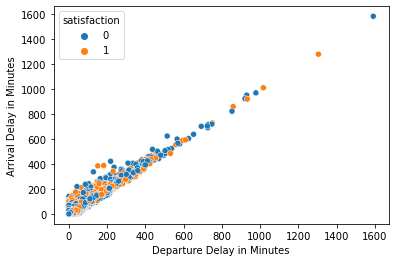

In [16]:
sns.scatterplot(x=training['Departure Delay in Minutes'], y=training['Arrival Delay in Minutes'],hue=training['satisfaction'])

Departure Delay in Minutes e Arrival Delay in Minutes sono correlati linearmente, una delle due variabili andrebbe rimossa.
Siccome Arrival Delay in Minutes è l'unica variabile che presenta valori nulli, rimuoveremo questa variabile, ma prima di farlo voglio vedere se le righe che contengono valori nulli hanno una distribuzione di Departure Delay in Minutes molto diversa da quella osservata, in modo da decidere se tenerle o no.

In [17]:
righenull=training[training.isna().any(axis=1)].copy()

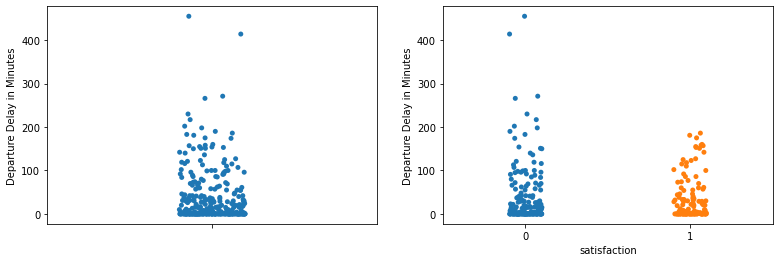

In [18]:
fig,ax = plt.subplots(ncols=2, figsize=(13, 4))
sns.stripplot(y=righenull['Departure Delay in Minutes'], ax=ax[0])
sns.stripplot(y=righenull['Departure Delay in Minutes'],x=righenull['satisfaction'], ax=ax[1])

plt.show()

In [19]:
righenull['Departure Delay in Minutes'].count()

310

La distribuzione non sembra presentare diversità molto evidenti rispetto a quanto visto negli istogrammi e nello scatterplot, quindi decido di tenere le righe e elimino la colonna Arrival Delay in Minutes.

In [20]:
training.drop('Arrival Delay in Minutes', axis=1, inplace=True)
test.drop('Arrival Delay in Minutes', axis=1, inplace=True)

- Punto 2

In [21]:
#variabili con 6 valori
var_6val= [var for var in training.columns if training[var].value_counts().count()==6]

#voglio vedere la frequenza di 0 per ogni colonna
for var in var_6val:
        print( f'{var}: {training[var].loc[training[var]==0].count()}')

Inflight wifi service: 3103
Departure/Arrival time convenient: 5300
Ease of Online booking: 4487
Gate location: 1
Food and drink: 107
Online boarding: 2428
Seat comfort: 1
Inflight entertainment: 14
On-board service: 3
Leg room service: 472
Checkin service: 1
Inflight service: 3
Cleanliness: 12


Scarto le righe che contengono 0 nelle colonne che hanno una frequenza di 0 inferiore a 2428

In [22]:
var_pochi_0=[var for var in var_6val if training[var].loc[training[var]==0].count()<2428]
training=training.loc[~training[var_pochi_0].isin([0]).any(axis=1)]
training.shape

(103320, 24)

- Punto 3

In [23]:
training=training.loc[(training['Flight Distance']>70) & (training['Flight Distance']<4000) & (training['Departure Delay in Minutes']<200) 
                                  &( training['Age']<=70)]
training.shape

(101611, 24)

## Selezione delle Variabili

### -Matrice di correlazione

<AxesSubplot:>

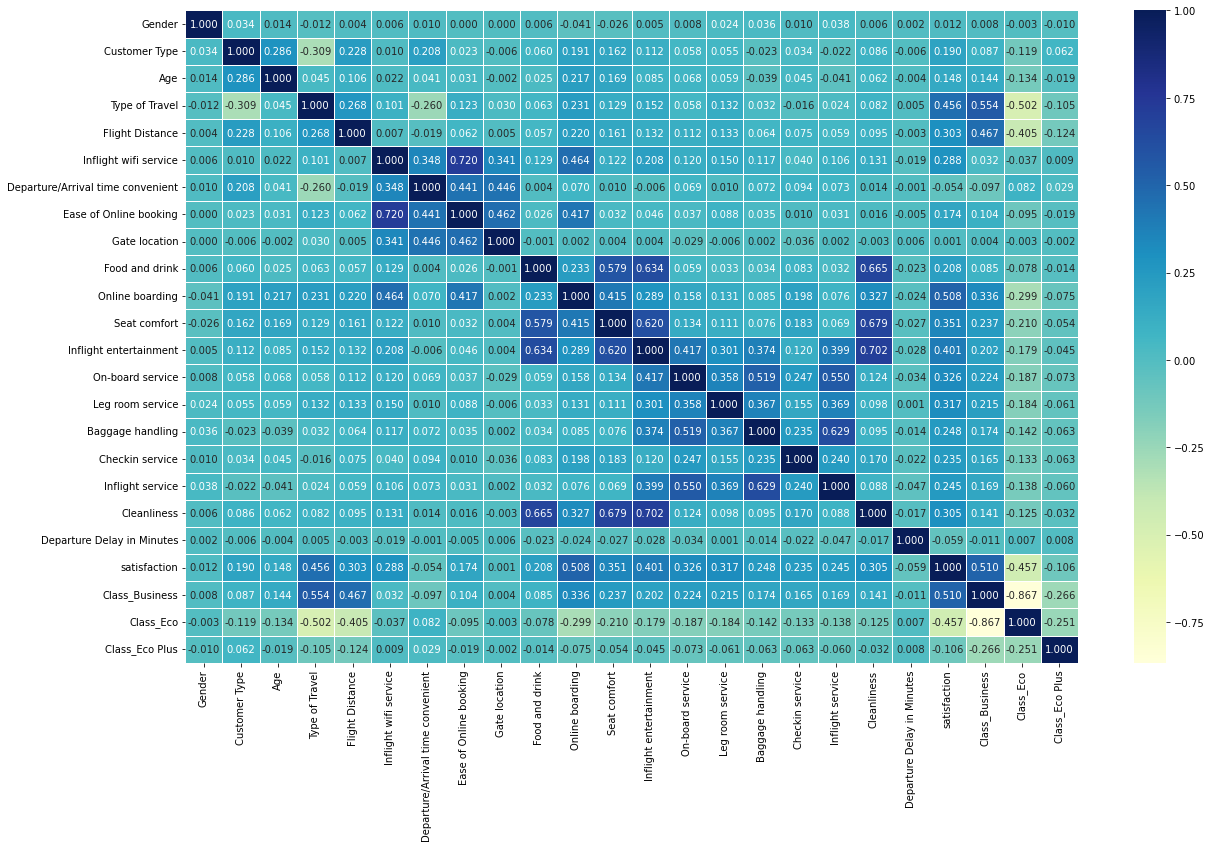

In [24]:
fig = plt.figure(figsize=(20, 12))
sns.heatmap(training.corr(), cmap="YlGnBu",annot=True, linewidths=.5,fmt='.3f')

Departure/Arrival time convenient, Gate location, Departure Delay in Minutes' e Gender son poco correlate a satisfaction, quindi saranno eliminate. Forse la variabile che sorprende di più è Departure Delay in Minutes, che è ha solo una leggerissima correlazione negativa con quasi tutte le variabili.

In [25]:
training.drop(['Departure/Arrival time convenient', 'Gate location', 'Departure Delay in Minutes', 'Gender'] ,axis=1, inplace=True)
test.drop(['Departure/Arrival time convenient', 'Gate location', 'Departure Delay in Minutes', 'Gender'] ,axis=1, inplace=True)

Per avere ancora più chiara l'importanza delle variabili faccio il test chi quadrato e l'analisi della varianza, ma prima è necessario scalare le variabili.

### -Scaling

In [26]:
#Prendo le variabili di training e test  
X_train_df=training.loc[:,training.columns!='satisfaction']
X_test_df=test.loc[:,test.columns!='satisfaction']

#definisco lo scaler
scaler=StandardScaler()

#Fit e trasform il training set escludendo il target 
X_train= scaler.fit_transform(X_train_df)

#Scalo il test in base al fitting del training set
X_test=scaler.transform(X_test_df)

#Definisco i target di training e test. Con values.ravel() li converto in array per poter essere utilizzati
y_train = training[['satisfaction']].values.ravel()
y_test = test[['satisfaction']].values.ravel()

#Per il test di chi quadrato ho bisogno che tutti i dati siano positivi, quindi scalo i dati con MinMaxScaler()
X_train_MM= MinMaxScaler().fit_transform(X_train)

### -Chi quadrato

In [27]:
#Considero tutte le variabili e applico chi quadrato
s_chi2=SelectKBest(chi2, k='all')

s_chi2.fit(X_train_MM, y_train)
X_chi2 = s_chi2.transform(X_train_MM)

#Stampo le variabili in ordine di maggior importanza
ordine_importanza=np.argsort(-s_chi2.scores_)
for i,i_chi2 in enumerate(ordine_importanza):
     print(f'{i+1}){X_train_df.columns[i_chi2]}: {s_chi2.scores_[i_chi2]:.2f}')

1)Class_Business: 13765.12
2)Class_Eco: 11697.25
3)Type of Travel: 6554.99
4)Inflight entertainment: 3064.80
5)Online boarding: 2945.33
6)Seat comfort: 2234.72
7)Flight Distance: 2089.33
8)On-board service: 1863.90
9)Leg room service: 1824.43
10)Cleanliness: 1775.71
11)Inflight wifi service: 1078.64
12)Class_Eco Plus: 1059.01
13)Checkin service: 970.88
14)Food and drink: 877.93
15)Baggage handling: 824.94
16)Inflight service: 787.20
17)Customer Type: 676.10
18)Ease of Online booking: 427.17
19)Age: 241.46


### -ANOVA

In [28]:
#Considero tutte le variabili e applico f_classif
s_ANOVA=SelectKBest(f_classif, k='all')
s_ANOVA.fit(X_train, y_train)
X_train_ANOVA = s_ANOVA.transform(X_train)

#Stampo le variabili in ordine di maggior importanza
for i,i_ANOVA in enumerate( np.argsort(-s_ANOVA.scores_)):
     print(f'{i+1}){X_train_df.columns[i_ANOVA]}: {s_ANOVA.scores_[i_ANOVA]:.2f}')

1)Class_Business: 35712.10
2)Online boarding: 35322.28
3)Class_Eco: 26867.84
4)Type of Travel: 26705.93
5)Inflight entertainment: 19448.55
6)Seat comfort: 14270.76
7)On-board service: 12047.64
8)Leg room service: 11362.03
9)Cleanliness: 10428.78
10)Flight Distance: 10242.02
11)Inflight wifi service: 9179.91
12)Baggage handling: 6678.06
13)Inflight service: 6483.71
14)Checkin service: 5947.09
15)Food and drink: 4606.81
16)Customer Type: 3813.17
17)Ease of Online booking: 3167.42
18)Age: 2263.23
19)Class_Eco Plus: 1153.33


<AxesSubplot:xlabel='risultati', ylabel='variabili'>

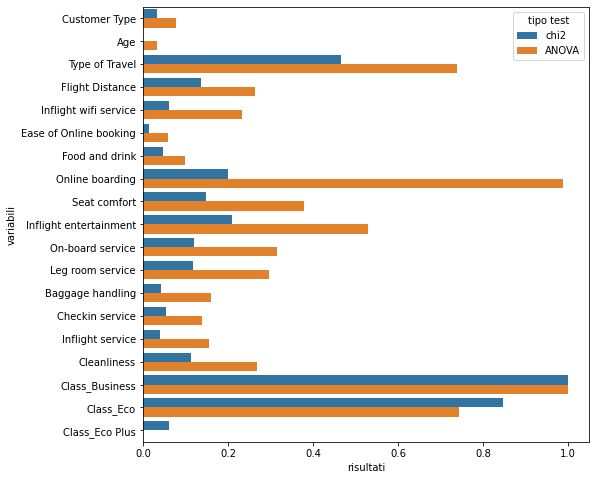

In [29]:
#Faccio un df con i dati dei test
risultati_test=pd.DataFrame( { 'variabili':X_train_df.columns,
                              'chi2': s_chi2.scores_,
                              'ANOVA': s_ANOVA.scores_}) 

#Per poter confrontare meglio i dati di chi quadrato con ANOVA scalo i risultati dei test con MinMaxScaler
scaler=MinMaxScaler()
risultati_test.iloc[:,1:]= scaler.fit_transform(risultati_test.iloc[:,1:])

#Converto la tabella in un formato più facilmente rappresentabile con barplot
rt=risultati_test.set_index('variabili')
rt = rt.stack().reset_index().set_index('variabili').rename(columns={'level_1': 'tipo test', 0: 'risultati'})

#Creo il grafico di comparazione
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(y=rt.index,x='risultati',hue='tipo test' ,data=rt, orient = "h")

Dai test notiamo che le variabili più importanti sono Online boarding,Class_Business ,Class_Eco ,Type of Travel e Inflight entertainment. Le variabili Age e Class_Eco Plus pur essendo arrivate ultime nei due test, hanno un punteggio non completamente trascurabile in almeno uno dei test, quindi decido di tenerle.

# Previsione

Per quanto riguarda le metriche, siccome voglio prevedere bene sia i soddisfatti che i neutrali/insoddisfatti, oltre all'accuratezza userò la precisione e il recupero.

- Accuratezza:(positivi veri+negativi veri)/(positivi veri+positivi falsi+negativi veri+negativi falsi)
- Precisione: positivi veri/(positivi veri+falsi positivi)
- Recupero: positivi veri/(positivi veri+falsi negativi)

dove, in questo caso, i positivi sono i soddisfatti, i negativi i neutrali/insoddisfatti,  per veri si intende i correttamente previsti, per falsi gli incorrettamente previsti.

Per quanto riguarda la previsione seguirò due strade: nella prima userò tutte le variabili, nella seconda userò le 4 variabili migliori in base ai risultati ottenuti nella matrice di correlazione, nel test chi quadrato e nell' ANOVA. Per ogni strada procederò effettuando prima uno Spot Check con Kfold, utilizzando i modelli RandomForest, AdaBoost, DecisionTree, KNN e LogisticRegression e poi per i due modelli più accurati farò un tuning degli iperparametri. Infine in base ai risultati ottenuti nelle due strade, sceglierò il modello più performante in base alle metriche definite qui sopra.

In [30]:
#Variabili di training della seconda strada

#Siccome Class_Business e Class_Eco sono altamente correlati, considero solo Class_Business che è la classe fra queste due che ha performato meglio
X4=['Online boarding','Class_Business','Type of Travel','Inflight entertainment']
X4_train=training.loc[:,X4].values
X4_test=test.loc[:,X4].values

In [31]:
kfold = KFold(n_splits=5)

In [32]:
modelli={
    'Ada Boost':AdaBoostClassifier(random_state=7),
    'Random Forest': RandomForestClassifier(random_state=7),
    'Decision Tree':  DecisionTreeClassifier(random_state=7),
    'KNN':  KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(max_iter = 2000,random_state=7)
     }

In [33]:
#Creo una funzione per lo Spot Check 
def Spot_Check(Xtrain,ytrain):
    for nome_modello in modelli.keys():
        accuratezze_cv = cross_val_score(modelli[nome_modello], Xtrain, ytrain, cv=kfold, scoring='accuracy')
        print(f'{nome_modello}: {accuratezze_cv.mean():.3f}')

In [34]:
#Creo una funzione per la valutazione dei modelli più performarti nello Spot Check
def valutazione(Xtrain,Xtest,modello,parametri):
    
    #Con la GridSearch verranno testati, nei 5 subset di allenamento-validazione del training set, i diversi parametri (e iperparametri) scelti 
    modello_gs = GridSearchCV(modello, param_grid=parametri, cv=5 ,n_jobs=-1)
    modello_gs.fit(Xtrain, y_train)
    print(f'Parametri migliori: {modello_gs.best_params_}\n')
    
    #Con best_estimator_ prendo i parametri migliori e poi faccio il fitting del modello
    modello_migliore =modello_gs.best_estimator_.fit(Xtrain, y_train)
    
    #Previsioni sugli esempi di test
    y_pred=modello_migliore.predict(Xtest)
    print(f'Accuratezza: {accuracy_score(y_test,y_pred):.3f}\nPrecisione: {precision_score(y_test, y_pred):.3f}\nRecupero: {recall_score(y_test, y_pred):.3f}\n')
    
    #Mostro una confusion matrix per avere una visione grafica dei risultati
    plot_confusion_matrix(modello_migliore, Xtest, y_test)

## 1) Tutte le variabili

In [35]:
Spot_Check(X_train,y_train)

Ada Boost: 0.926
Random Forest: 0.962
Decision Tree: 0.944
KNN: 0.934
Logistic Regression: 0.876


### -Random Forest

Parametri migliori: {'max_features': 8, 'min_samples_split': 10, 'n_estimators': 1000}

Accuratezza: 0.963
Precisione: 0.973
Recupero: 0.942



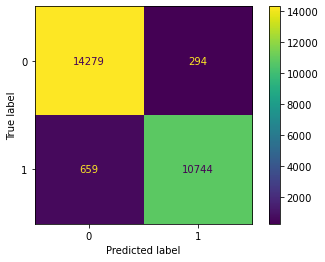

In [36]:
#Considero come iperparametri  max_features e min_samples split
parametri_rf = { 
  
    #Assegno un solo valore di n_estimators, ma abbastanza elevato in modo da assicurarmi che con un valore ancora più elevato il modello 
    #non migliori in modo considerevole. Siccome il dataset è molto grande ho scelto il valore di 1000.
    'n_estimators': [1000],
    
    # max_ features rappresenta la dimensione del campione casuale di variabili che il modello considera quando si divide un nodo in ogni albero
    # più è basso maggiore è il bias in ogni albero. E' l'imperparametro più importante, per questo ho scelto 3 valori.
    'max_features': [1,3,8],
    
    #min_samples_split è il numero di elementi richiesti per dividere un nodo interno, aumentando il valore di questo iperparametro si previene l'overfitting
    'min_samples_split': [2,10]
}

valutazione(X_train,X_test,RandomForestClassifier(random_state=7),parametri_rf)

### -Decision Tree 

Parametri migliori: {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2}

Accuratezza: 0.962
Precisione: 0.970
Recupero: 0.941



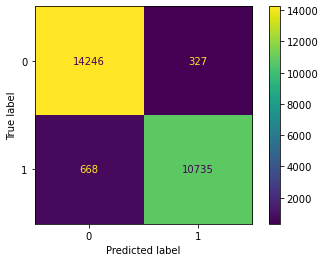

In [37]:
#Considero max_depth,min_samples_leaf e min_samples_split. 
parametri_dt={
    #Scelgo diversi valori di profondità in modo da trovare il giusto compromesso di fitting
    'max_depth':[5,50,100, None],
    
    #Valgono le considerazioni fatte per RandomForest, in questo caso valido più parametri, perchè Decision Tree è più soggetto a overfitting
    'min_samples_split': [2,5,10],
    
    #Indica il numero minimo di elementi in una foglia. Come per min_samples_split, valori troppo alti possono causare underfitting, troppo bassi overfitting
    'min_samples_leaf' :[2,5,10],
}
        
valutazione(X_train,X_test,RandomForestClassifier(random_state=7),parametri_dt)

## 2) Variabili più importanti

In [38]:
Spot_Check(X4_train,y_train)

Ada Boost: 0.859
Random Forest: 0.872
Decision Tree: 0.872
KNN: 0.854
Logistic Regression: 0.839


### -Random Forest

Parametri migliori: {'max_features': 1, 'min_samples_split': 10, 'n_estimators': 1000}

Accuratezza: 0.869
Precisione: 0.874
Recupero: 0.819



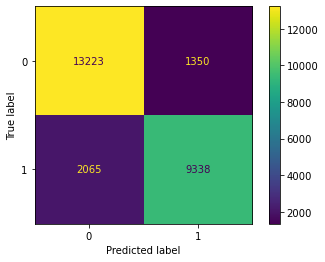

In [39]:
#Considero gli stessi iperparametri della strada 1, siccome in questo caso ho 4, per max_features variabili prendo solo il valore 1 e 2
parametri_rf4 = { 
    'n_estimators': [1000],
    'max_features': [1,2,3],
    'min_samples_split': [2,10]
}

valutazione(X4_train,X4_test,RandomForestClassifier(random_state=7),parametri_rf4)

### -Decision Tree 

Parametri migliori: {'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 2}

Accuratezza: 0.869
Precisione: 0.874
Recupero: 0.819



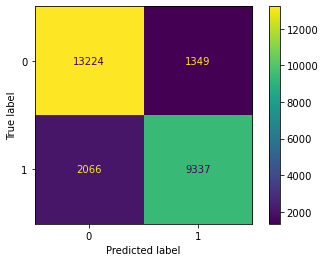

In [40]:
 parametri_dt4={
    'max_depth':[5,50,100, None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf' :[2,5,10]
}
        
valutazione(X4_train,X4_test,RandomForestClassifier(random_state=7),parametri_dt4)

# Conclusioni

Scelgo Random Forest della prima strada perchè ha le metriche più alte, anche se la differenza è minima. Usare tutti i dati si è rivelata essere la scelta migliore: questa non è una sorpresa visto che sia nella correlation matrix che nel test ANOVA e chi quadrato c'erano diverse variabili con pesi significativi.

L'analisi si è concentrata prevalentemente nell' ottenere un buon modello predittivo, ma si possono trarre alcune conclusioni anche sulle variabili che possono essere più facilmente migliorate:

1. La classe business è il fattore principale di soddisfazione dei clienti, in particolare i passeggeri Eco ed Eco plus sono soddisfatti rispettivamente solo nel 18.6% e nel 24.6% dei casi, mentre i passeggeri della classe Business il 69,4%. 

2. Un occhio di riguardo dovrebbe essere dato alle procedure online( Ease of Online booking e Online boarding): Gran parte dei passeggeri riporta voti minori di 4 e insoddisfazione, mentre specialmente per voti uguali a 5 la soddisfazione è molto alta.

3. Per Inflight wifi service valgono le stesse considerazioni delle procedure online, in particolare da 4 a 5 c'è una grande differenza: i passeggeri che danno un voto uguale a 5 sono quasi tutti soddisfatti (circa il 99%), mentre quelli che danno un voto uguale a 4 son soddisfatti per la metà dei casi.

I punti 1. e 2. dovrebbero essere i più facilmente migliorabili, mentre ci si dovrebbe concentrare anche sul punto 3. se è possibile offrire ai passeggeri un ottimo servizio wifi.